In [6]:
%load_ext autoreload
%autoreload 2

import pprint
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import environment
import td_n_step_sarsa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
def to_arrow(pi):
    directions = []
    arrows = ["↑", "→", "↓", "←"]
    for actions in pi:
        for i in range(len(actions)):
            if actions[i] > 0:
                directions.append(arrows[i])
    
    return directions

def run():
    grid_actions = 4
    grid = [
        ".......",
        ".......",
        ".......",
        ".......",
        ".......",
        "SCCCCCT",
        "......."
    ]
    # env
    env = environment.create(grid=grid, step_reward=-1, cliff_reward=-100)
    
    # S, A
    n_row = len(grid)
    n_col = len(grid[0])
    S = [s for s in range(n_row * n_col)]
    A = [a for a in range(grid_actions)]
    
    # agent
    agent = {
        "discount": 0.9,
        "step_size": 0.05,
        "epsilon": 0.1,
        "trace_length": 3,
        "n_iterations": 500,
        "learn_online": True,
        "plan_background": True
    }
    
    bootstraps = ["sarsa", "expected", "q"]
    results = []
    n_runs = 25
    
    for bootstrap in bootstraps:
        agent["bootstrap"] = bootstrap
        error_histories = []
        length_histories = []
        visit_counts = []
        q, pi = None, None
        
        for i in tqdm(range(n_runs)):
            q, pi, log = td_n_step_sarsa.learn(S, A, env, agent)
            error_history, length_history, visit_count = log
            
            error_histories.append(error_history)
            length_histories.append(length_history)
            visit_counts.append(visit_count)
        
        results.append((bootstrap, np.average(error_histories, axis=0), 
                        np.average(length_histories, axis=0), np.average(visit_counts, axis=0)))
    
    return results

results = run()


100%|██████████| 25/25 [00:09<00:00,  2.66it/s]


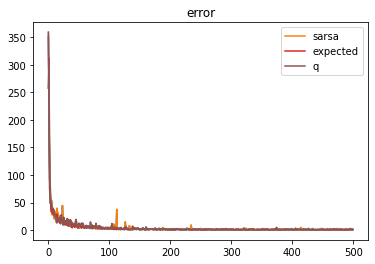

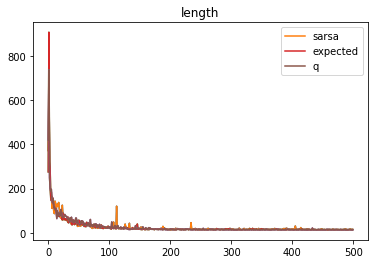

sarsa
[[ 1.88  0.72  0.44  0.76  0.76  0.4   0.12]
 [ 0.64  0.92  0.4   0.64  0.76  0.44  0.36]
 [ 3.68  4.6   5.    5.24  4.84  3.84  2.52]
 [20.28 16.76 16.8  15.68 16.68 17.48 19.44]
 [20.4   1.56  2.08  1.64  2.36  2.   25.32]
 [22.2   0.92  0.04  0.08  0.04  4.76 23.64]
 [ 1.48  0.2   0.16  0.16  0.24  0.56  5.48]]
expected
[[ 0.92  0.44  0.44  0.16  0.32  0.2   0.12]
 [ 0.24  0.2   0.48  0.52  0.68  0.48  0.28]
 [ 0.84  1.28  1.12  1.28  1.32  1.48  1.32]
 [20.36 19.72 19.52 19.6  19.2  19.2  19.8 ]
 [21.04  1.04  0.76  0.76  0.84  1.64 25.04]
 [21.2   0.4   0.08  0.04  0.    4.8  23.76]
 [ 1.    1.16  0.92  0.84  0.32  0.84  5.64]]
q
[[ 0.12  0.32  0.28  0.08  0.04  0.12  0.2 ]
 [ 0.68  0.8   0.8   0.36  0.24  0.32  0.32]
 [ 1.04  0.88  1.    1.12  1.2   1.6   1.6 ]
 [20.12 19.84 19.76 19.72 18.84 18.2  18.12]
 [20.44  0.96  0.6   1.52  2.52  3.64 25.08]
 [21.56  0.84  0.04  0.    0.04  5.   23.56]
 [ 0.56  0.16  0.12  0.08  0.08  0.08  4.76]]


In [29]:
def plot(title, data):
    for d in data:
        plt.plot(d[1])
        plt.plot(d[1], label=d[0])
    plt.title(title)
    plt.legend()
    plt.show()
    
plot("error", [(result[0], result[1]) for result in results])
plot("length", [(result[0], result[2]) for result in results])

for result in results:
    print(result[0])
    print(result[3].reshape((7, 7)))
